In [1]:
# %conda install -c conda-forge numpy pandas seaborn scikit-learn scikit-surprise tqdm tensorflow matplotlib keras_tuner

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.16.2
3.6.0


### 차원

- 텐서의 각 차원은 데이터가 쌓이는 방식과 데이터를 포함하는 개수를 나타냅니다. 예를 들어 (2, 3, 4)라는 shape의 텐서는:
  - 2개의 층을 가지고,
  - 각 층에 3개의 행렬이 있으며,
  - 각 행렬에는 4개의 값이 포함되어 있습니다.


In [3]:
"""
Loss functions
    분류용:
        "sparse_categorical_crossentropy": 클래스가 정수로 레이블된 다중 클래스 분류에 사용됩니다.
        "categorical_crossentropy": 클래스가 원핫 인코딩으로 레이블된 다중 클래스 분류에 사용됩니다.
        "binary_crossentropy": 이진 분류
    회귀용:
        "mean_squared_error" 또는 "mse": 평균 제곱 오차, 회귀 문제에 자주 사용됩니다.
        "mean_absolute_error" 또는 "mae": 평균 절대 오차, 예측값과 실제 값 사이의 절대 차이를 계산합니다.
        "mean_absolute_percentage_error" 또는 "mape": 평균 절대 백분율 오차, 예측값과 실제 값의 비율 차이를 백분율로 계산합니다.

optimizers
    "sgd": 확률적 경사 하강법(Stochastic Gradient Descent)
    "rmsprop": 학습 속도를 조절하는 RMSProp 알고리즘
    "adam": Adam 최적화기 (경사 하강법과 모멘텀을 결합한 최적화) tf.keras.optimizers.Adam(learning_rate=0.001)
    "adagrad": 학습 속도를 데이터에 맞춰 자동 조정합니다.

metric: 평가 지표 
    분류용:
        "accuracy" 또는 "acc": 정확도, 예측이 맞는 샘플의 비율
        "precision": 양성 예측 중 올바르게 예측된 양성의 비율
        "recall": 실제 양성 중 올바르게 예측된 양성의 비율
        "f1_score": 정밀도와 재현율의 조화 평균 (Keras에서는 직접 구현해야 함)
    회귀용:
        "mae": 평균 절대 오차
        "mse": 평균 제곱 오차
        "mean_absolute_percentage_error" 또는 "mape": 예측과 실제 값의 백분율 오차
        "cosine_proximity": 두 벡터 간의 코사인 유사도
"""

# (2, 3, 4) 형태의 텐서 생성
x = tf.constant([
    [   # 첫 번째 층 (0번째 인덱스)
        [1, 2, 3, 4],    # 첫 번째 행
        [5, 6, 7, 8],    # 두 번째 행
        [9, 10, 11, 12]  # 세 번째 행
    ],
    [   # 두 번째 층 (1번째 인덱스)
        [13, 14, 15, 16], # 첫 번째 행
        [17, 18, 19, 20], # 두 번째 행
        [21, 22, 23, 24]  # 세 번째 행
    ]
])

print(x.shape)  # 출력: (2, 3, 4)
print(x)


(2, 3, 4)
tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)


### 퍼셉트론

- FC(Dense) Layer : 한층이 다른층과 모두 연결되어 있는경우
- MLP: 입력레이어와 하나 이상의 히든레이어, 그리고 출력 레이어로 구성되어있는 퍼셉트론

### 전형적인 퍼셉트론 구조

- 뉴런수, 손실함수, 액티베이션 함수


### 시퀀셜 API


In [4]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# check shape
print(X_train_full.shape)
print(y_train_full.shape)

# Split test and train
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# for y label
class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle Boot"
               ]

# Sequential API
model = keras.Sequential()
model.add(keras.layers.Input(shape = [28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = "relu")) # 1 배열로 변환 -> X.reshape(-1,28*28)
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# show summary
model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# compile the model

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


(60000, 28, 28)
(60000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7764 - loss: 0.6257 - val_accuracy: 0.8638 - val_loss: 0.3751
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.3683 - val_accuracy: 0.8758 - val_loss: 0.3366
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3220 - val_accuracy: 0.8562 - val_loss: 0.3785
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8892 - loss: 0.2979 - val_accuracy: 0.8850 - val_loss: 0.3200
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2803 - val_accuracy: 0.8822 - val_loss: 0.3280
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8994 - loss: 0.2664 - val_accuracy: 0.8818 - val_loss: 0.3206
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9058 - loss: 0.2496 - val_accuracy: 0.8756 - val_loss: 0.3671
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9092 - loss: 0.2391 - 

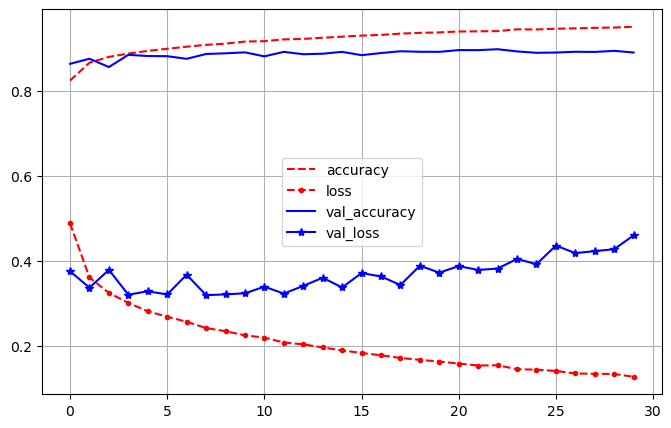

In [5]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid= True, style=["r--","r--.","b-","b-*"]
)
plt.show()

In [6]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
np.array(class_names)[y_proba.argmax(axis = 1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

# 시퀀셜 API 회귀용


In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load Data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# create a model 
tf.random.set_seed(42)

# 사이킷 런의 standard scaler 와 동일 한 작업 수행, 그러나 fit 전에 adapt 를 사용하여 훈련 셋에 적용 필요
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]

y_pred = model.predict(X_new)



/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - RootMeanSquaredError: 1.3200 - loss: 1.8765 - val_RootMeanSquaredError: 0.8802 - val_loss: 0.7748
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - RootMeanSquaredError: 0.6258 - loss: 0.3920 - val_RootMeanSquaredError: 0.7802 - val_loss: 0.6087
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - RootMeanSquaredError: 0.6033 - loss: 0.3642 - val_RootMeanSquaredError: 0.5752 - val_loss: 0.3308
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - RootMeanSquaredError: 0.5943 - loss: 0.3534 - val_RootMeanSquaredError: 1.2692 - val_loss: 1.6110
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - RootMeanSquaredError: 0.5861 - loss: 0.3436 - val_RootMeanSquaredError: 1.0888 - val_loss: 1.1856
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - RootMeanSquaredError: 0.5778 - loss: 0.3340 - val_RootMeanSquaredError: 0.5733 - val_loss: 0.3286
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - RootMeanSquaredError

# 함수형 API

- 순차적이지 않고 입력이 여러개인 신경망을 만들때 사용


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2= tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

normalization_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]

y_pred = model.predict(X_new)

(11610, 8)
(5160, 8)
(3870, 8)
Epoch 1/20


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_17']. Received: the structure of inputs=*
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - RootMeanSquaredError: 1.5444 - loss: 2.5090 - val_RootMeanSquaredError: 0.7908 - val_loss: 0.6254
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - RootMeanSquaredError: 0.7398 - loss: 0.5479 - val_RootMeanSquaredError: 0.6518 - val_loss: 0.4249
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - RootMeanSquaredError: 0.6498 - loss: 0.4223 - val_RootMeanSquaredError: 0.6280 - val_loss: 0.3944
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - RootMeanSquaredError: 0.6478 - loss: 0.4201 - val_RootMeanSquaredError: 0.6713 - val_loss: 0.4506
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - RootMeanSquaredError: 0.6880 - loss: 0.4769 - val_RootMeanSquaredError: 0.6086 - val_loss: 0.3704
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - RootMeanSquaredError: 0.6354 - loss: 0.4046 - val_RootMeanSquaredError: 0.5982 - val_loss: 0.3579
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - RootMeanSquaredError: 0.6047 - 

### 입력층이 여러개인 함수형 API


In [9]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_23', 'keras_tensor_24']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - RootMeanSquaredError: 1.4656 - loss: 2.2432 - val_RootMeanSquaredError: 0.7428 - val_loss: 0.5517
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - RootMeanSquaredError: 0.7415 - loss: 0.5507 - val_RootMeanSquaredError: 0.6459 - val_loss: 0.4172
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - RootMeanSquaredError: 0.6660 - loss: 0.4438 - val_RootMeanSquaredError: 0.8304 - val_loss: 0.6895
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - RootMeanSquaredError: 0.6417 - loss: 0.4120 - val_RootMeanSquaredError: 1.0092 - val_loss: 1.0184
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - RootMeanSquaredError: 0.6297 - loss: 0.3967 - val_RootMeanSquaredError: 1.3515 - val_loss: 1.8265
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - RootMeanSquaredError: 0.6239 - loss: 0.3895 - val_RootMeanSquaredError: 1.8389 - val_loss: 3.3817
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - RootMeanSquaredError: 0.6210 - 

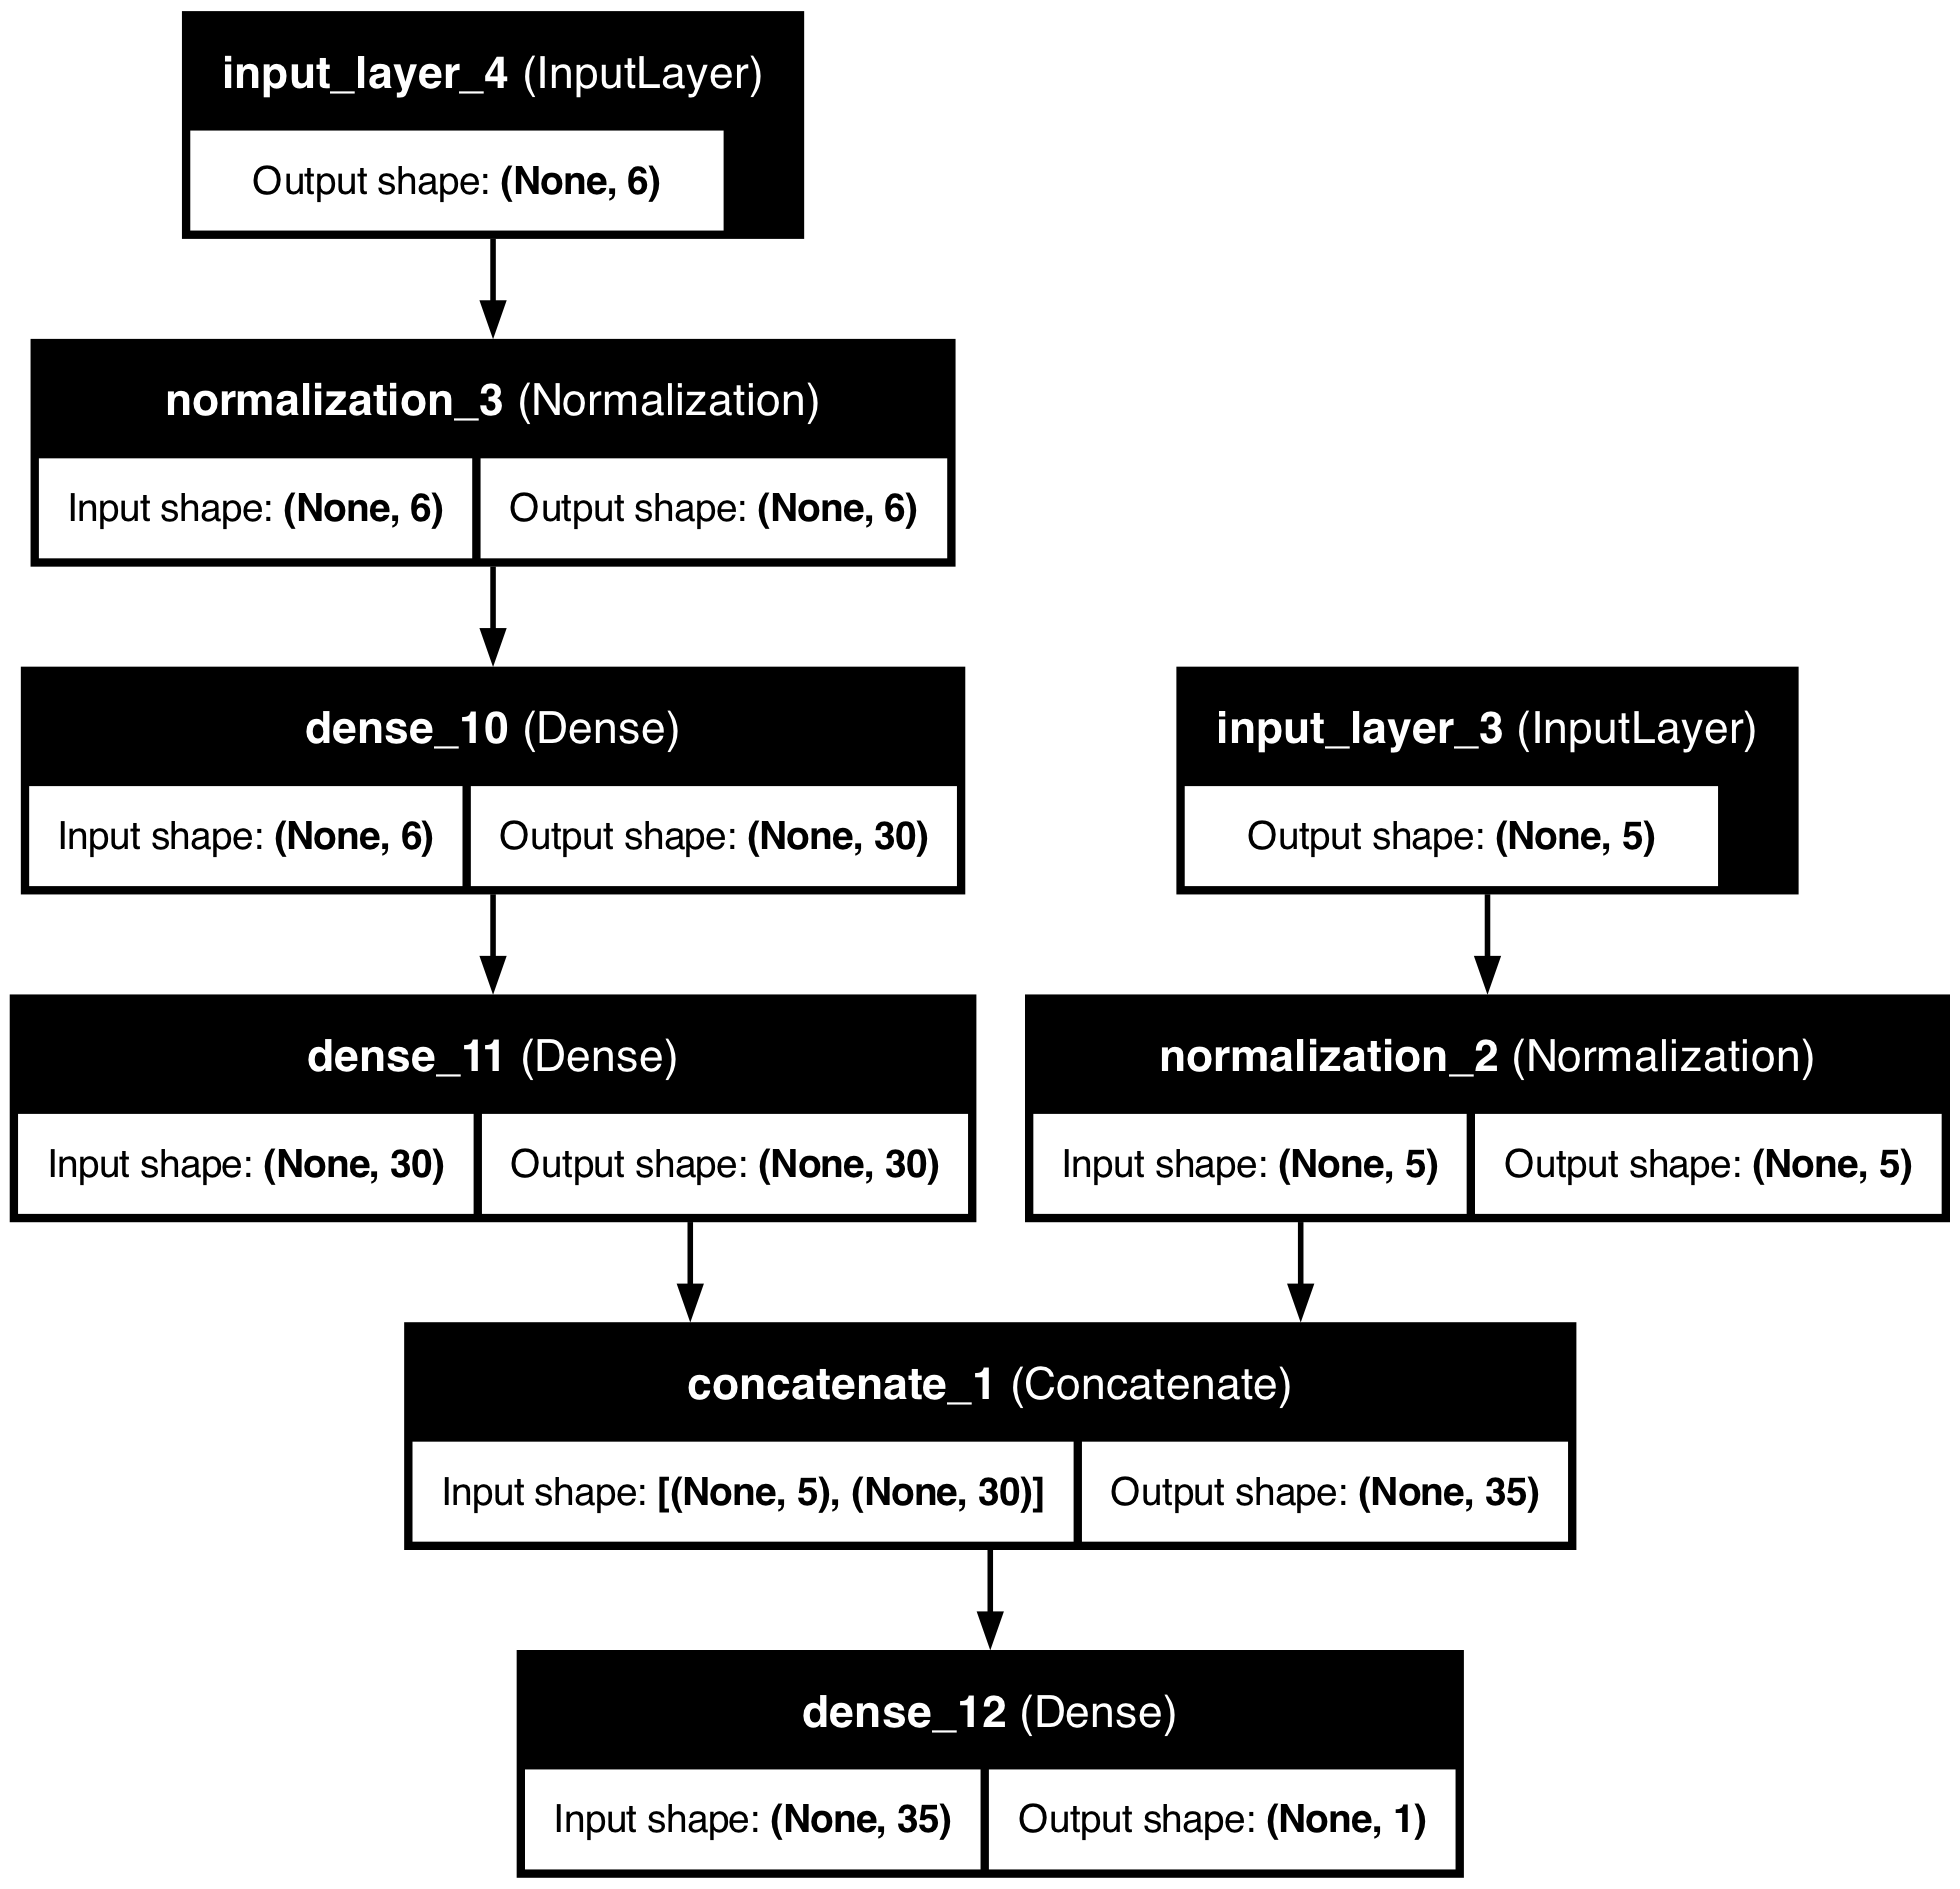

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 모델 저장과 로드


In [11]:
model.save('my_model.keras')
model = keras.models.load_model('my_model.keras')
model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_3', 'input_layer_4']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[0.36719245],
       [1.3876952 ],
       [3.5953512 ]], dtype=float32)

# 하이퍼 파라미터 튜닝

- 커널 초기화 전략: 훈련중 그래디언트 소실 혹은 폭주 방지

  - he_normal -> Relu
  - 글로럿 -> 소프트멕스, tanh

- 배치 노말라이제이션: 훈련중 그래디언트 소실 혹은 폭주 방지

- 옵티마이저 -> 아담이 최고

- 규제

  - l1, l2
  - 드롭아웃

- regularized dense 를 쓰는것도 좋은 방법 -> 리팩토링이 쉬워짐


In [12]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate = 0.003, beta_1=0.9, beta_2=0.999))


X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)


#로그 기록용
def get_run_logdir(root_logdir = "./my_logs"):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

## 콜백 함수 지정
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)


history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid),
                     callbacks = [checkpoint_cb, early_stoping_cb, tensorboard_cb])


mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


model = keras.models.load_model('my_keras_model.keras')
model.predict((X_new_wide, X_new_deep))

Epoch 1/20


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_44', 'keras_tensor_45']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 1.6897 - val_loss: 0.8779
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.4605 - val_loss: 1.9616
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.4185 - val_loss: 0.5326
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.4084 - val_loss: 6.7392
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.4070 - val_loss: 8.6141
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.4088 - val_loss: 0.3490
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.3739 - val_loss: 0.4630
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.3700 - val_loss: 0.4308
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.3578 - val_loss: 0.5122
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.3511 - val_loss: 0.3322
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.3486 - val_loss: 0.4035
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_5', 'input_layer_6']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([[0.4669809],
       [1.0849344],
       [3.7516189]], dtype=float32)

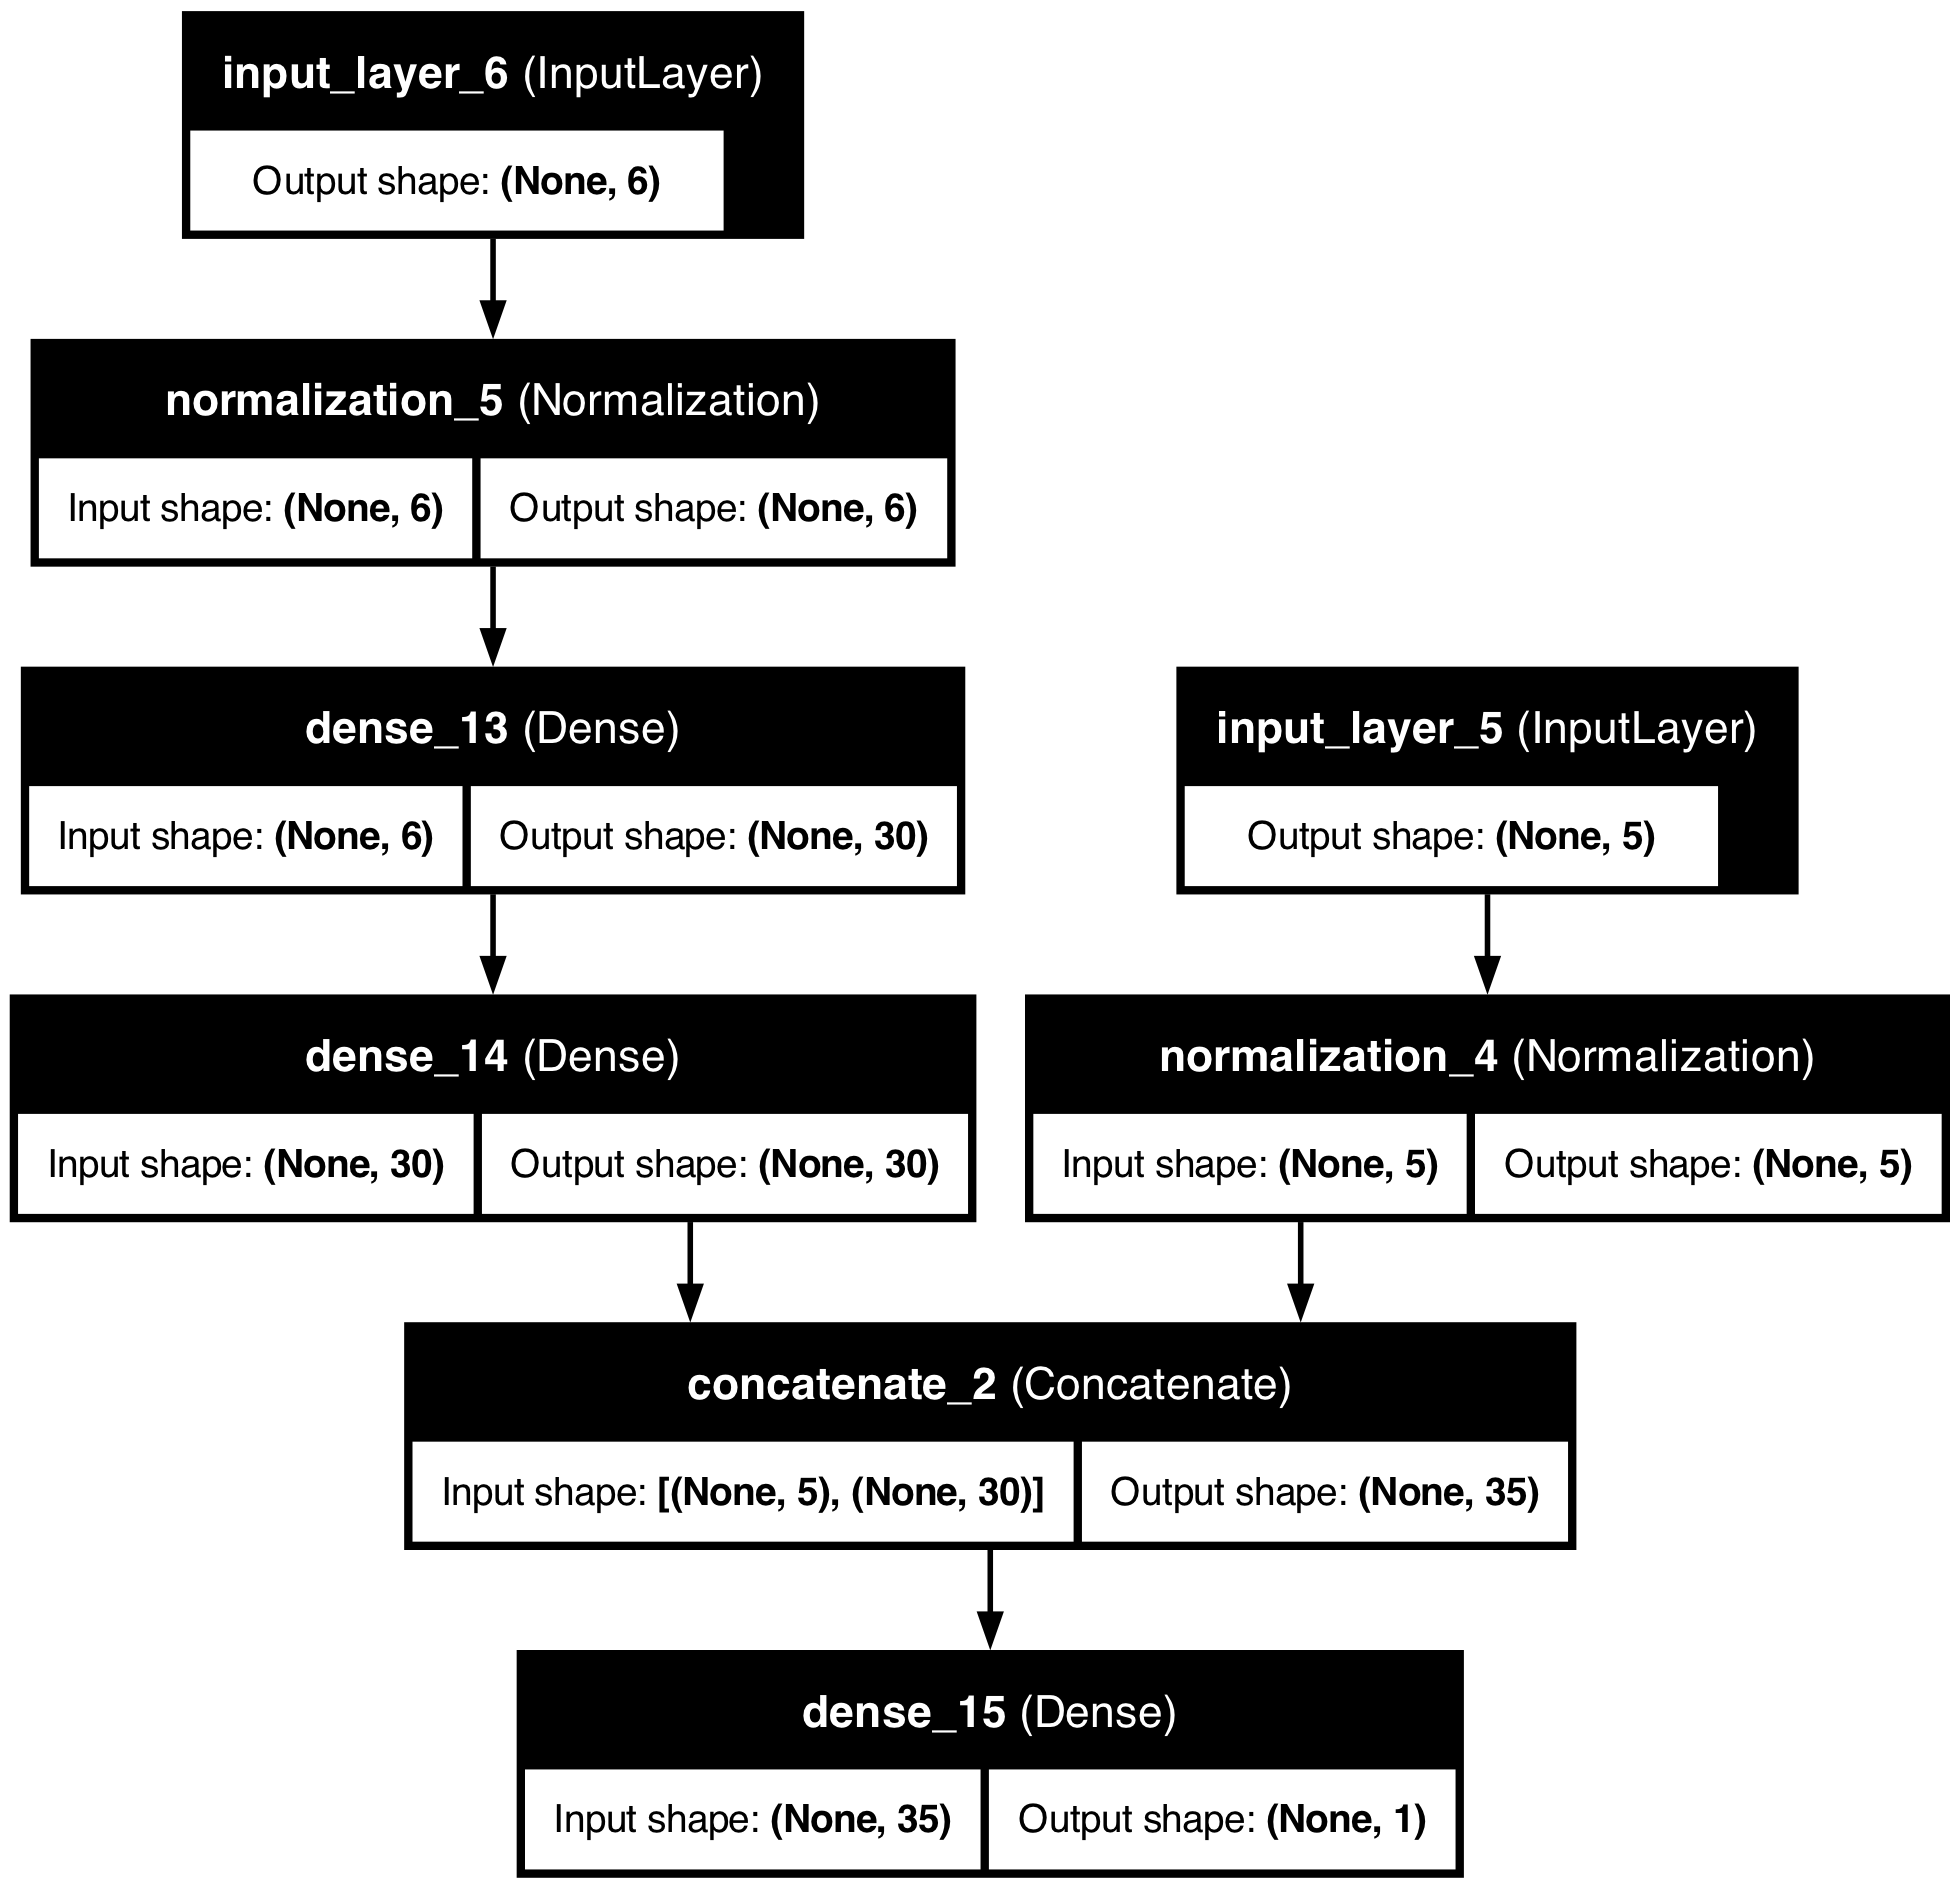

In [13]:
# 모델 그리기
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### 텐서 보드 시각화


In [15]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

%reload_ext tensorboard


!kill 68450


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 68450), started 0:00:18 ago. (Use '!kill 68450' to kill it.)

zsh:kill:1: kill 67926 failed: no such process


# 하이퍼 파라미터 튜링

- GridSearchCV
- RandomizedSearch CV
- use Keras-tuner !


In [19]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))




Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.004392764996737242

Best val_accuracy So Far: 0.004392764996737242
Total elapsed time: 00h 00m 12s


In [20]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 5,
 'n_neurons': 25,
 'learning_rate': 0.0006562536901904111,
 'optimizer': 'sgd'}

### More about hyper parameter


In [34]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate = 0.003, beta_1=0.9, beta_2=0.999))


X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)


#로그 기록용
def get_run_logdir(root_logdir = "./my_logs"):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

## 콜백 함수 지정
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_no_tuning.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)


history = model.fit((X_train_wide, X_train_deep), y_train, epochs=200,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid),
                     callbacks = [checkpoint_cb, early_stoping_cb, tensorboard_cb])


mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

print(mse_test)

Epoch 1/200


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_118', 'keras_tensor_119']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - loss: 2.1342 - val_loss: 0.7492
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.4979 - val_loss: 0.3974
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.4221 - val_loss: 1.1564
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3942 - val_loss: 0.8498
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.3836 - val_loss: 0.3282
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.3597 - val_loss: 0.3237
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3518 - val_loss: 0.3375
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.3462 - val_loss: 0.3205
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.3397 - val_loss: 0.4114
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.3364 - val_loss: 0.5157
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.3358 - val_loss: 0.8880
Epoch 12/200
363/363 ━━━━━━━━━━

In [35]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.utils import plot_model

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

drop_layer1 = tf.keras.layers.Dropout(rate = 0.2)(norm_deep)

hidden1 = tf.keras.layers.Dense(30,
                                kernel_initializer= "he_normal",
                                kernel_regularizer= tf.keras.regularizers.l2(0.01),
                                activation="relu")(drop_layer1)

drop_layer2 = tf.keras.layers.Dropout(rate = 0.2)(hidden1)

batchNorm_layer1 = tf.keras.layers.BatchNormalization()(drop_layer2)

hidden2 = tf.keras.layers.Dense(30,
                                kernel_initializer= "he_normal",
                                kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                activation="relu")(batchNorm_layer1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

drop_layer3 = tf.keras.layers.Dropout(rate = 0.2)(concat)

batchNorm_layer2 = tf.keras.layers.BatchNormalization()(drop_layer3)

output = tf.keras.layers.Dense(1)(batchNorm_layer2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate = 0.003, beta_1=0.9, beta_2=0.999))

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)


#로그 기록용
def get_run_logdir(root_logdir = "./my_logs"):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

## 콜백 함수 지정
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_no_tuning.keras", save_best_only=True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)


history = model.fit((X_train_wide, X_train_deep), y_train, epochs=200,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid),
                     callbacks = [checkpoint_cb, early_stoping_cb, tensorboard_cb])


mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

print(mse_test)

Epoch 1/200


/Users/yunjaecho/Git/recommender_system/env/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_126', 'keras_tensor_127']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 4.1527 - val_loss: 5.7642
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 1.4344 - val_loss: 2.5434
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 1.0485 - val_loss: 0.9287
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.8790 - val_loss: 0.8074
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.7807 - val_loss: 0.7656
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.7694 - val_loss: 1.3214
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.7314 - val_loss: 0.7471
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.7218 - val_loss: 1.4465
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 0.7356 - val_loss: 2.5288
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.7261 - val_loss: 0.6413
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.7349 - val_loss: 0.7005
Epoch 12/200
363/363 ━━━━━━━━━━

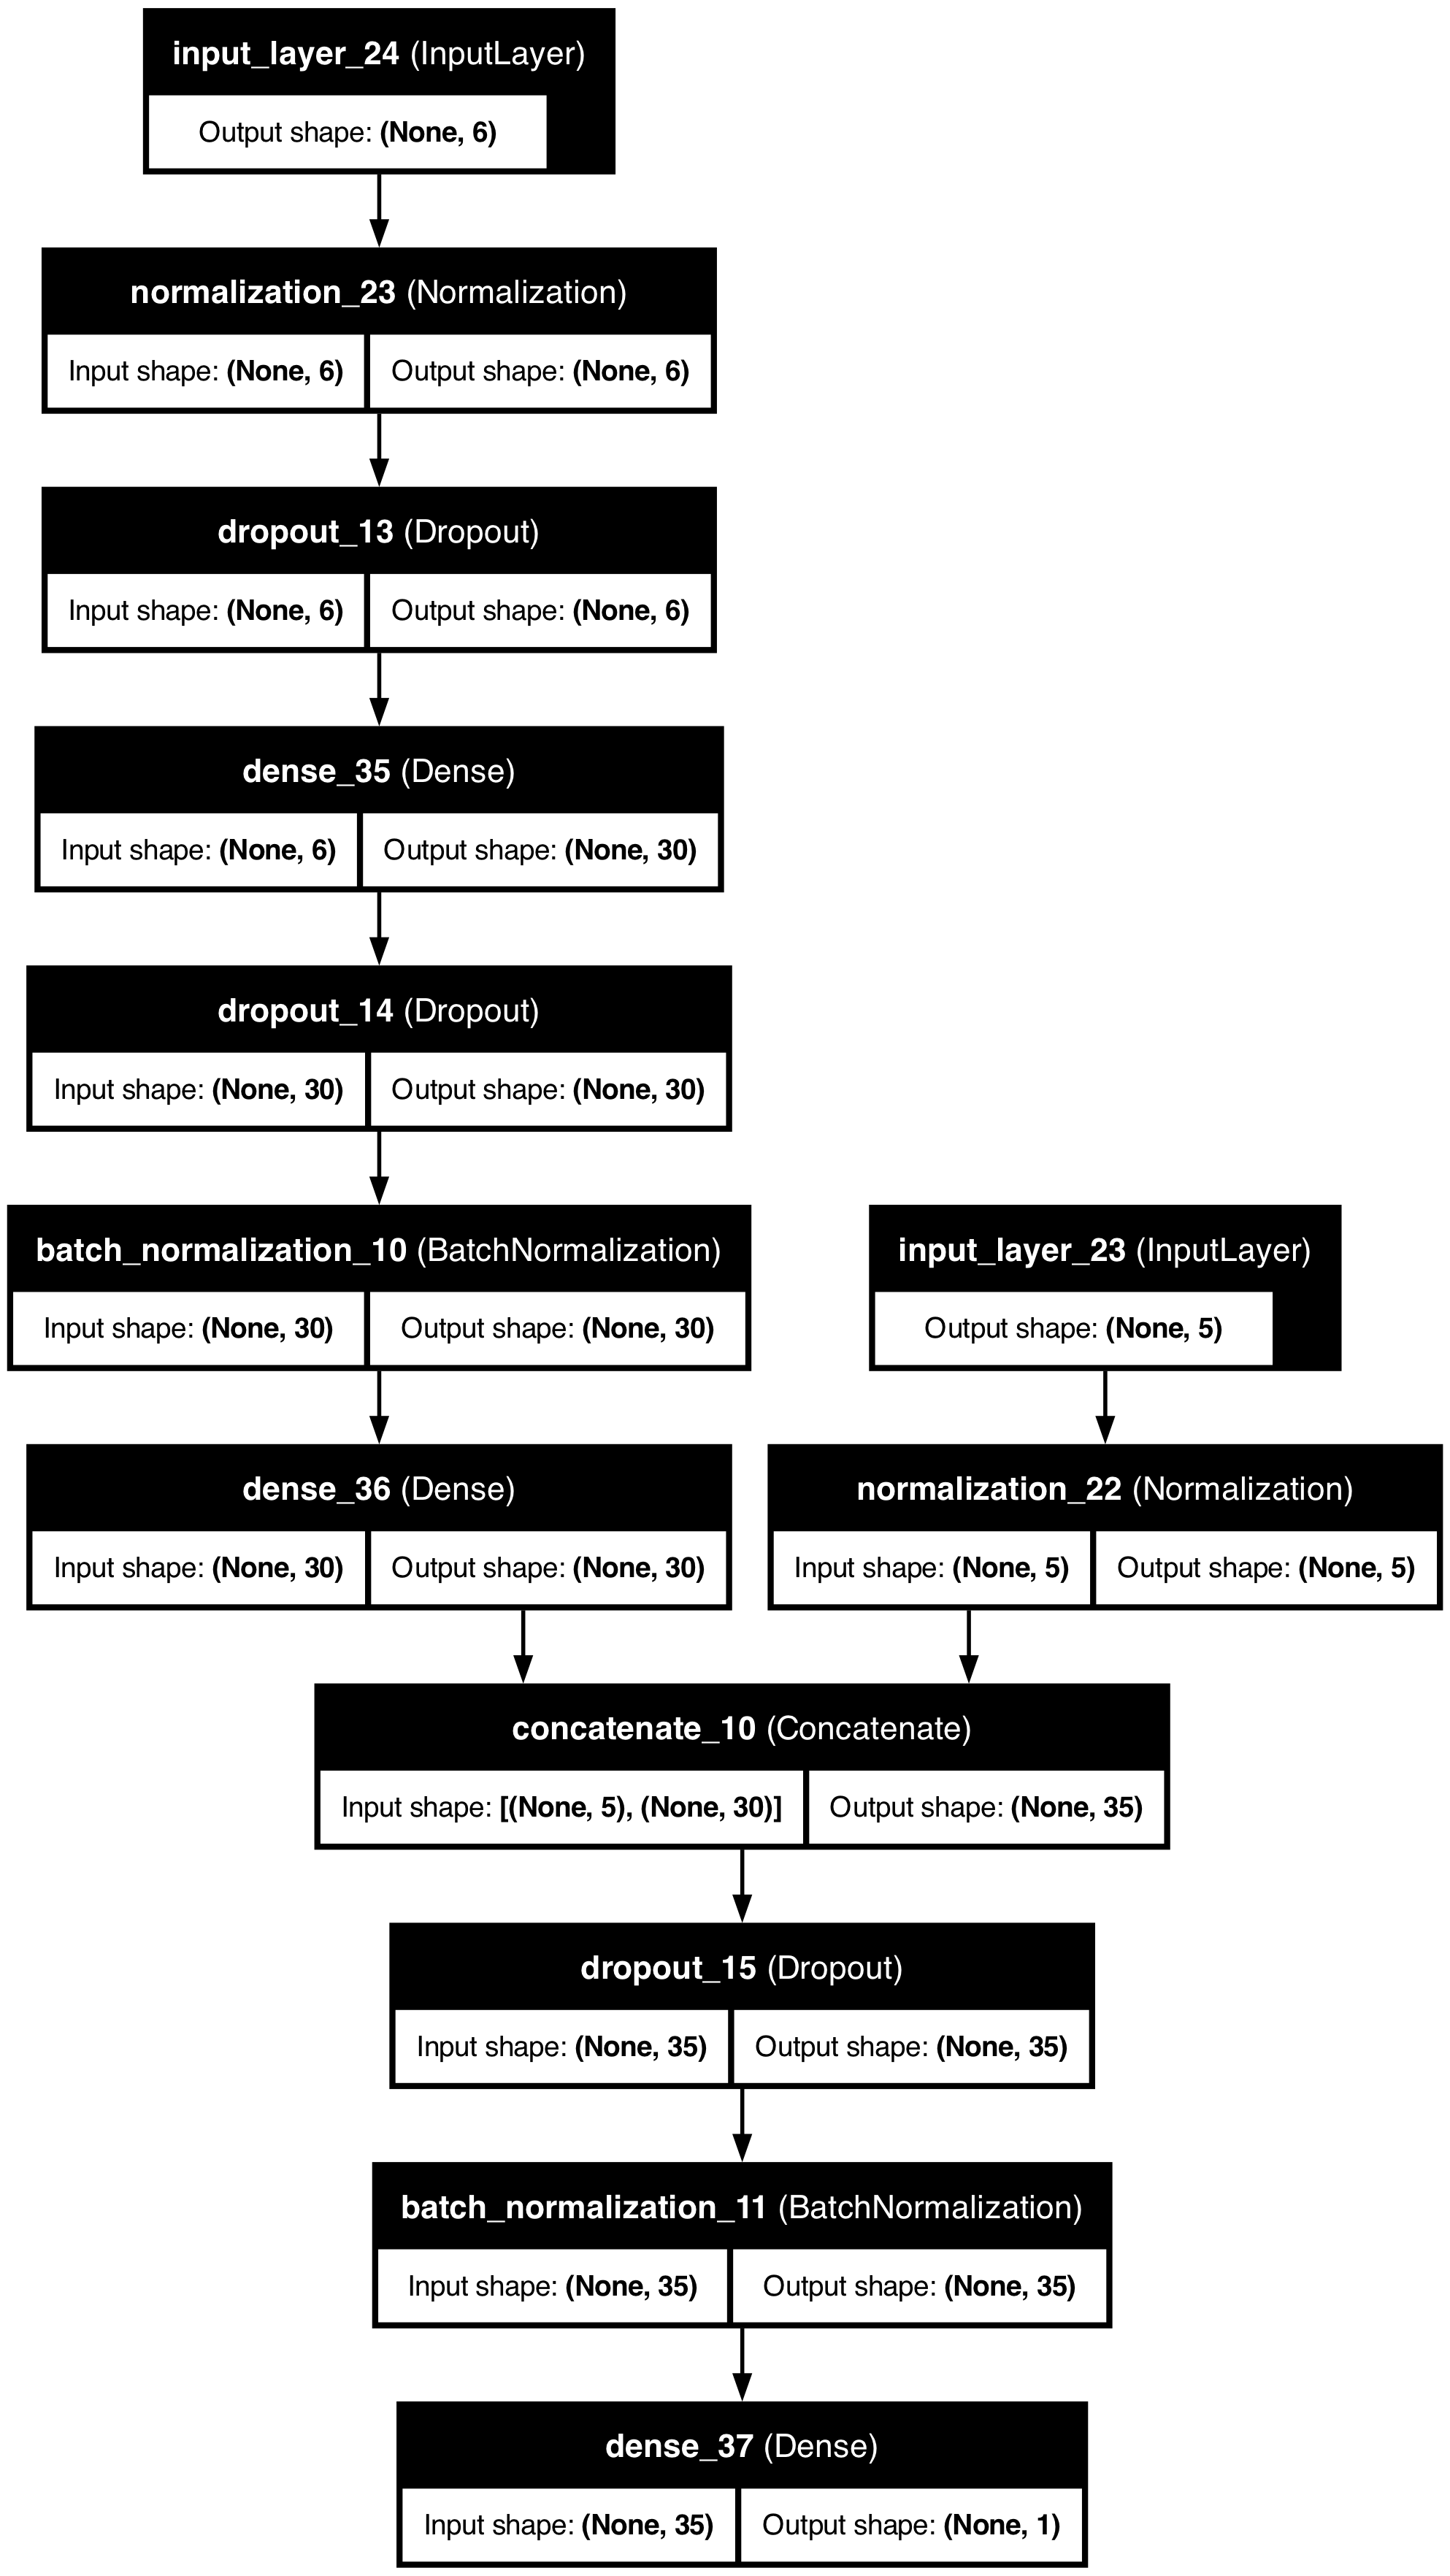

In [36]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
